In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def l2(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

In [3]:
def match(des, des1):
    cust_matches1 = []

    for i in range(len(des)):
        max_dist = math.inf
        train_idx = 0

        for j in range(len(des1)):
            dist = l2(des[i], des1[j])

            if dist < max_dist:
                max_dist = dist
                train_idx = j

        cust_matches1.append(cv2.DMatch(_distance=max_dist, _trainIdx=train_idx, _queryIdx=i, _imgIdx=0))
    return cust_matches1

In [4]:
def sort_match(matches):
    return sorted(matches, key = lambda x:x.distance)

In [5]:
def draw_matches(img, kp, scene1, kp1, cust_matches1):
    cust_res1 = cv2.drawMatches(img, kp, scene1, kp1, cust_matches1, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize = (15, 15))
    plt.imshow(cust_res1)
    plt.show()

In [6]:
img = cv2.imread('pika.jpg', cv2.IMREAD_GRAYSCALE)
scene1 = cv2.imread('scene1.jpg', cv2.IMREAD_GRAYSCALE)
scene2 = cv2.imread('scene2.jpg', cv2.IMREAD_GRAYSCALE)
scene3 = cv2.imread('scene3.jpg', cv2.IMREAD_GRAYSCALE)
scene4 = cv2.imread('scene4.png', cv2.IMREAD_GRAYSCALE)

In [8]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(img, None)
kp1, des1 = sift.detectAndCompute(scene1, None)
kp2, des2 = sift.detectAndCompute(scene2, None)
kp3, des3 = sift.detectAndCompute(scene3, None)
kp4, des4 = sift.detectAndCompute(scene4, None)

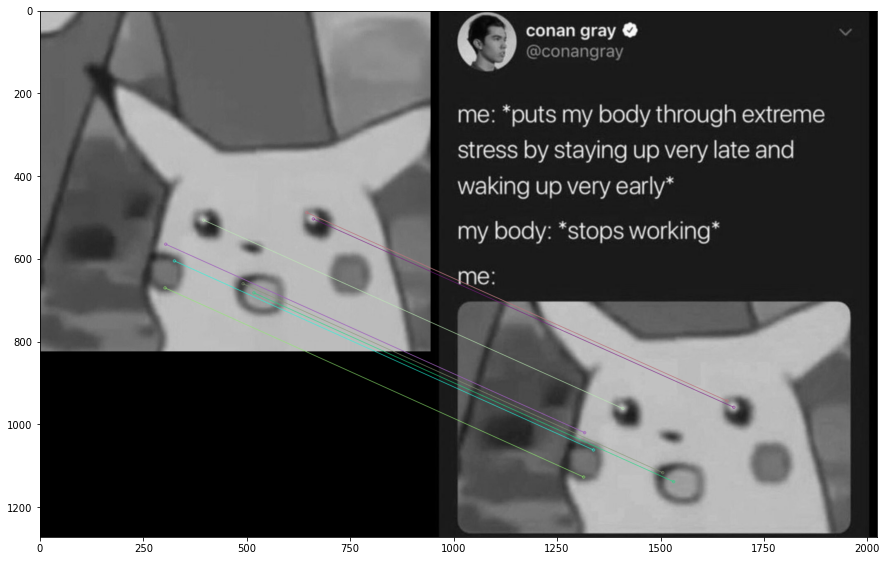

In [9]:
matches = match(des, des1)
matches = sort_match(matches)
draw_matches(img, kp, scene1, kp1, matches[:10])

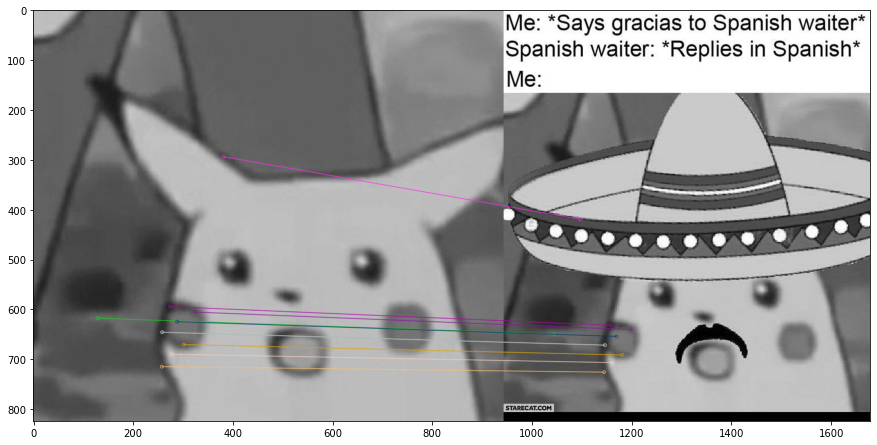

In [10]:
matches = match(des, des2)
matches = sort_match(matches)
draw_matches(img, kp, scene2, kp2, matches[:10])

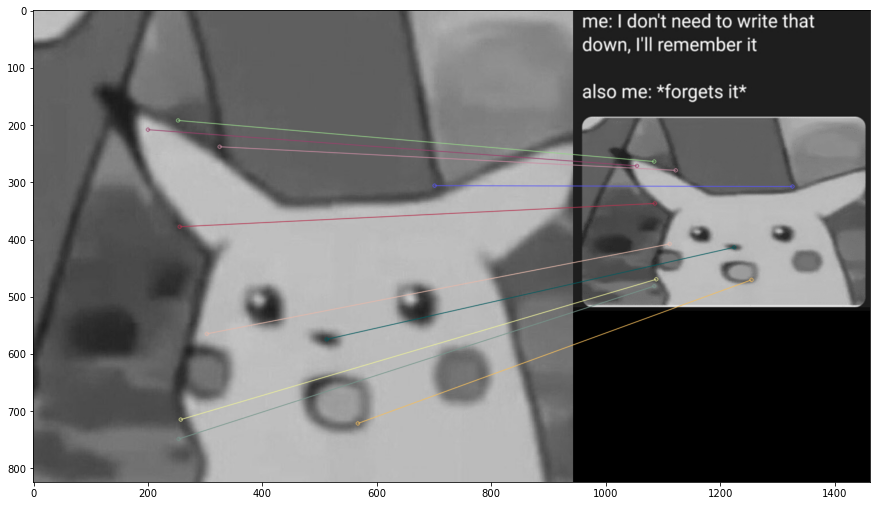

In [11]:
matches = match(des, des3)
matches = sort_match(matches)
draw_matches(img, kp, scene3, kp3, matches[:10])

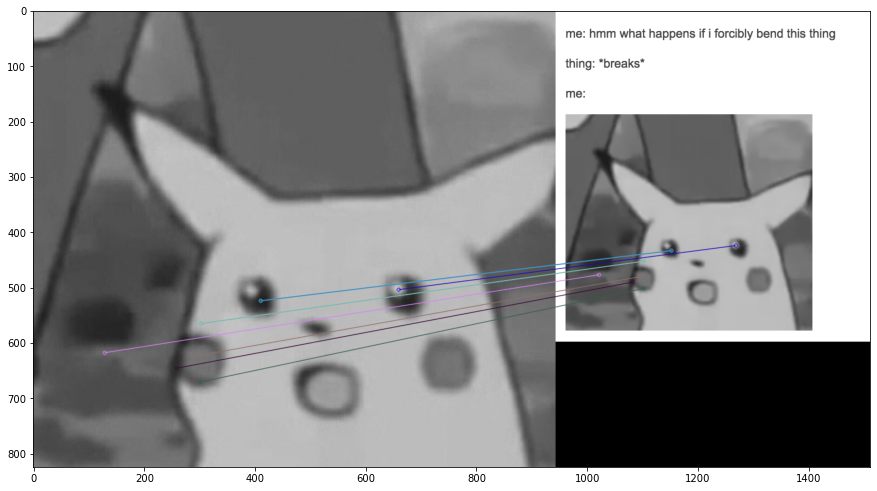

In [12]:
matches = match(des, des4)
matches = sort_match(matches)
draw_matches(img, kp, scene4, kp4, matches[:10])